In [1]:
from model import train_cnn, plot_loss, increase_brightness, convert_RGB
from visualization import read_preview_images, show_lambda_crop_layers,  predict_layer_output
import cv2, csv
import numpy as np
from keras.models import Model
from keras.models import load_model
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Train model

In [2]:
batch = 128
epochs = 10
model_name = "model"
history_object = train_cnn(epochs, batch, model_name+".h5")

Training samples:  40240
Validation samples:  7545



/home/carnd/SelfDrivingCarND-Proj4/model.py:110: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="relu", name="conv1", strides=(2, 2))`
  model.add(Conv2D(48, (5, 5), subsample=(2,2), activation='relu',name='conv1'))
/home/carnd/SelfDrivingCarND-Proj4/model.py:111: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(72, (5, 5), activation="relu", name="conv2", strides=(2, 2))`
  model.add(Conv2D(72, (5, 5), subsample=(2,2), activation='relu', name='conv2'))
/home/carnd/SelfDrivingCarND-Proj4/model.py:112: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (5, 5), activation="relu", name="conv3", strides=(2, 2))`
  model.add(Conv2D(96, (5, 5), subsample=(2,2), activation='relu', name='conv3'))


Epoch 1/10
79/78 [==============================] - 217s 3s/step - loss: 0.0883 - val_loss: 0.0446
Epoch 2/10
79/78 [==============================] - 199s 3s/step - loss: 0.0459 - val_loss: 0.0400
Epoch 3/10
79/78 [==============================] - 198s 3s/step - loss: 0.0419 - val_loss: 0.0369
Epoch 4/10
79/78 [==============================] - 198s 3s/step - loss: 0.0384 - val_loss: 0.0333
Epoch 5/10
79/78 [==============================] - 198s 3s/step - loss: 0.0352 - val_loss: 0.0313
Epoch 6/10
79/78 [==============================] - 196s 2s/step - loss: 0.0323 - val_loss: 0.0297
Epoch 7/10
79/78 [==============================] - 198s 3s/step - loss: 0.0298 - val_loss: 0.0263
Epoch 8/10
79/78 [==============================] - 197s 2s/step - loss: 0.0271 - val_loss: 0.0258
Epoch 9/10
79/78 [==============================] - 197s 2s/step - loss: 0.0262 - val_loss: 0.0240
Epoch 10/10
79/78 [==============================] - 197s 2s/step - loss: 0.0246 - val_loss: 0.0230
Model sav

dict_keys(['loss', 'val_loss'])


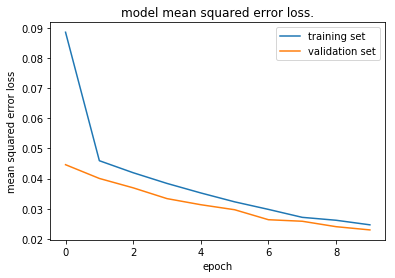

In [3]:
plot_loss(history_object, model_name)

## Load saved model

In [4]:
#load the saved model
model = load_model(model_name+".h5")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 160, 320, 3)       0         
_________________________________________________________________
crop (Cropping2D)            (None, 90, 320, 3)        0         
_________________________________________________________________
conv1 (Conv2D)               (None, 43, 158, 48)       3648      
_________________________________________________________________
conv2 (Conv2D)               (None, 20, 77, 72)        86472     
_________________________________________________________________
conv3 (Conv2D)               (None, 8, 37, 96)         172896    
_________________________________________________________________
conv4 (Conv2D)               (None, 6, 35, 128)        110720    
_________________________________________________________________
conv5 (Conv2D)               (None, 4, 33, 128)        147584    
__________

## Read example images for CNN visualization

In [5]:
#read the preview images
img_num = 10
images = read_preview_images(img_num)
print(images.shape)
for img in images:
    img = convert_RGB(img)

(6, 160, 320, 3)


## Predict output of lambda and crop layers

In [6]:
#predict output of lambda and crop layers
#output saved to /CNN_images/output

show_lambda_crop_layers(images, model)

Input array shape:  (6, 160, 320, 3)
Norm layer output shape:  (6, 160, 320, 3)
Crop layer output shape:  (6, 90, 320, 3)
Predicted images saved.


## Predict output of convolutional layers

In [7]:
#predict output of convolutional layers
#output saved to /CNN_images/output

layer_name = 'conv1'
predict_layer_output(images, model, layer_name)

The conv1 layer shape is (6, 43, 158, 48) and has 48 filters
There are 6 input images 
Combined filter image array has shape: (235, 43, 158)
Each filter has 43 x 158
Combined image is 3096 x 632 and has 1956672 pixels


In [8]:
layer_name = 'conv2'
predict_layer_output(images, model, layer_name)

The conv2 layer shape is (6, 20, 77, 72) and has 72 filters
There are 6 input images 
Combined filter image array has shape: (355, 20, 77)
Each filter has 20 x 77
Combined image is 2160 x 308 and has 665280 pixels


In [9]:
layer_name = 'conv3'
predict_layer_output(images, model, layer_name)

The conv3 layer shape is (6, 8, 37, 96) and has 96 filters
There are 6 input images 
Combined filter image array has shape: (475, 8, 37)
Each filter has 8 x 37
Combined image is 1152 x 148 and has 170496 pixels


In [10]:
layer_name = 'conv4'
predict_layer_output(images, model, layer_name)

The conv4 layer shape is (6, 6, 35, 128) and has 128 filters
There are 6 input images 
Combined filter image array has shape: (635, 6, 35)
Each filter has 6 x 35
Combined image is 1152 x 140 and has 161280 pixels


In [11]:
layer_name = 'conv5'
predict_layer_output(images, model, layer_name)

The conv5 layer shape is (6, 4, 33, 128) and has 128 filters
There are 6 input images 
Combined filter image array has shape: (635, 4, 33)
Each filter has 4 x 33
Combined image is 768 x 132 and has 101376 pixels
